In [1]:
%pip install geocoder
%pip install leafmap
%pip install keplergl
%pip install geopandas
%pip install shapely
%pip install polyline shapely

In [2]:
%pip install ipywidgets

In [3]:
%pip install streamlit

In [4]:
%pip install openpyxl

In [5]:
import leafmap.foliumap as leafmap
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString
import streamlit as slt

In [6]:
import folium


# Define the location
location = [28.46310977267537, 77.49084307057997]

# Use OpenStreetMap (which usually works without issues)
m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Display the map
m


In [7]:
df = pd.DataFrame({'longitude': [ 77.49084307057997, 77.45454994761712] , 'latitude': [28.46310977267537,28.505514913643445 ]})

geometry = gpd.GeoSeries.from_xy(df.longitude, df.latitude, crs="EPSG:4326")

In [8]:
from folium import GeoJson  # ✅ Correct


# Create the map
location = [28.46310977267537, 77.49084307057997]

m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Convert the GeoDataFrame to GeoJSON and add to the map
GeoJson(geometry).add_to(m)

# Display the map
m

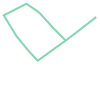

In [9]:
a = LineString([
          [
            77.50785818037207,
            28.46245622976184
          ],
          [
            77.50481603744953,
            28.460078924934678
          ],
          [
            77.50126687070735,
            28.457367246338848
          ],
          [
            77.49849936568813,
            28.46015321651963
          ],
          [
            77.49577411265324,
            28.463161981839463
          ],
          [
            77.49520854995058,
            28.463659180253657
          ],
          [
            77.49280444144017,
            28.465304236558254
          ],
          [
            77.48791524832603,
            28.462796971024204
          ],
          [
            77.49069088400023,
            28.458274788162882
          ],
          [
            77.49339012603258,
            28.455006159309164
          ],
          [
            77.49524903799801,
            28.45303597803543
          ],
          [
            77.50123320665523,
            28.45735689574508
          ]
        ]
            )
a


In [10]:
a = gpd.GeoSeries(a, crs='4326')

In [11]:

# Create the map
location = [28.46310977267537, 77.49084307057997]


m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Convert the GeoDataFrame to GeoJSON and add to the map
GeoJson(a).add_to(m)

# Display the map
m

In [12]:
import geocoder
g = geocoder.arcgis('National Highway 24 Bypass Flyover, Nyay Khand 2, 201014, Indirapuram, Ghaziabad, Ghaziabad, Uttar Pradesh, India')
latlon = g.lat, g.lng
print(latlon)

(28.6473632, 77.3744706)


In [13]:
df = pd.DataFrame({'longitude': [latlon[1]], 'latitude': [latlon[0]]})
g = gpd.GeoSeries.from_xy(df.longitude, df.latitude, crs="EPSG:4326")


# Create the map
location = [28.46310977267537, 77.49084307057997]

m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Convert the GeoDataFrame to GeoJSON and add to the map
GeoJson(g).add_to(m)

# Display the map
m


In [14]:


# Ensure compatibility with .xlsx format
df = pd.read_csv('GN_Restuarents.csv')


# Convert to numeric, handling errors
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

# Display DataFrame
print(df.head())


   fas_id                            name  \
0     NaN                      Bekal Café   
1     NaN  Namaste Punjab - Gr Noida West   
2     NaN                Trees and Treats   
3     NaN                 CARNIVALE Noida   
4     NaN                      Dine House   

                                             address  pincode   latitude  \
0  Unit 9, Golden I, Techzone 4, Amrapali Leisure...   201306  28.590805   
1  4th floor, Galaxy Blue Sapphire Plaza, Haibatp...   201009  28.607584   
2  Amity University Rd, opposite JIMS COLLEGE, Kn...   201310  28.465407   
3  5th Floor, Galaxy Blue Sapphire Plaza, Greater...   201310  28.607365   
4  Prasandi Market, Block F, Gamma 1, Greater Noi...   201310  28.487428   

   longitude  
0  77.435428  
1  77.436357  
2  77.483013  
3  77.435893  
4  77.505493  


In [15]:
df.columns

Index(['fas_id', 'name', 'address', 'pincode', 'latitude', 'longitude'], dtype='object')

In [16]:
df = pd.DataFrame({'longitude': df.longitude, 'latitude': df.latitude})
geometry = gpd.GeoSeries.from_xy(df.longitude, df.latitude, crs="EPSG:4326")

# Create the map
location = [28.46310977267537, 77.49084307057997]

m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Convert the GeoDataFrame to GeoJSON and add to the map
GeoJson(geometry).add_to(m)

# Display the map
m


In [17]:
# importing the requests library
import requests

# api-endpoint
url = "https://router.project-osrm.org/route/v1/driving/13.388860,52.517037;13.397634,52.529407;13.428555,52.523219?overview=full"



# sending get request and saving the response as response object
r = requests.get(url )

# extracting data in json format
data = r.json()
encoded_polyline = data['routes'][0]['geometry']
encoded_polyline

'mfp_I__vpAWBSBE?C?C@m@DuALI@O@wAJK@SBOOG@K@c@DyBPA?G@IDIDA@M@]BUBSBA?E@E@A@IFWBG@C?WBm@FG@I@aBNG@k@FM@OBaBNG@M@mAFc@@}@Fu@DG?a@B]@oAF}@JA?[Do@FoCXSBO@ODA@UDA?ODE@GBC?uBNE?OAKCE]AK[mCCSGi@[iCUaBAKAOSsAE[i@mEa@eDAMACAKAMAEGg@AKQuACOKy@E_@G[Gc@]wBw@aFKw@M{@k@qDCMAKIq@?KAQ?KIuDI_D?GAk@AWCaAEuB@U@U?MCs@?I?IASAg@ASMaF?OAi@?c@@c@Du@r@cH@U@I@G@I?G~@kJRyBf@uE@KFg@BM@OFa@Dc@BMFa@Dc@@GT_CDa@BWBSNy@Ha@RiAfBuJF]DOh@yAHSf@aADIR_@JS@C@A@CJSWWEECEECOQe@a@CCUQOKq@i@_Au@{@y@GESO?_@?C?C?i@G{BIsCAKA[MaE?SKgDCi@?Q?YBKf@_ENg@D]T{ABIHm@FY@GBUJk@@IHcA?c@?QAQG]JKDC@ADCJODMDOFOFUT{@BKTw@La@\\eANg@L_@DOJ[DMJQn@kANYLUVg@`@q@P]Ta@HQR]b@y@`@s@Ve@JSHOR_@LUFIFIFEPGFAL?J@HBFBr@XNH^NHDTJNFTRRJd@LXFB@B?J@J@@X?L?F@jA@dB'

In [18]:
import polyline
decoded_polyline = polyline.decode(encoded_polyline, 5)
decoded_polyline = [t[::-1] for t in decoded_polyline]
decoded_polyline = gpd.GeoSeries(LineString(decoded_polyline[::-1]), crs='4326')

In [19]:
# Create the map
location = [28.46310977267537, 77.49084307057997]

m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Convert the GeoDataFrame to GeoJSON and add to the map
GeoJson(decoded_polyline).add_to(m)

# Display the map
m


In [20]:
def main(path):
  url = ''
  df= pd.read_csv(path)
  df = df.iloc[:300,:]
  df['latitude'] = pd.to_numeric(df['latitude'])
  df['longitude'] = pd.to_numeric(df['longitude'])
  for i in range(len(df)):
    url += str(df['longitude'][i]) + ',' + str(df['latitude'][i]) + ';'
  url = f"https://router.project-osrm.org/route/v1/driving/{url[:-2]}?overview=full"
  r = requests.get(url )
  data = r.json()
  encoded_polyline = data['routes'][0]['geometry']
  decoded_polyline = polyline.decode(encoded_polyline, 5)
  decoded_polyline = [t[::-1] for t in decoded_polyline]
  decoded_polyline = gpd.GeoSeries(LineString(decoded_polyline[::-1]), crs='4326')
  return decoded_polyline

In [21]:
route = main('GN_Restuarents.csv')


In [22]:
route


,0
0,"LINESTRING (77.45705 28.59199, 77.45705 28.591..."


In [23]:
# Create the map
location = [28.46310977267537, 77.49084307057997]

m = folium.Map(location=location, zoom_start=18, tiles="OpenStreetMap")

# Convert the GeoDataFrame to GeoJSON and add to the map
GeoJson(route).add_to(m)

# Display the map
m

MessageError: TypeError: google.colab.notebook.trust is not a function